
In this notebook, we train an AdaBoost Regressor for a small regression problem. 

For this, we are using the **Abalone Dataset** supplied on the UCI Machine Learning webpage.

As per the **Abalone Dataset's** details on the UCI Machine Learning webpage, the data contains **measurements of physical characteristics of different abalones**. There are a total of **9 attributes**, of which **8 are descriptive(Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, and Shell weight) and 1 is a target feature (Rings)**. It is also mentioned that are **no missing attribute values** in this dataset.

All the tasks to be performed are divided into the following sections.
<br>

* **TASK A: Data Loading, visualization and cleaning**
         a1. Reading the data, seeing the first few lines and displaying the features
         a2. Plotting histograms for all the features
         a3. Selecting two features to remove from the subsequent training and test steps
         a4. Relabeling instances and using One hot encoding on the 'Sex' feature 
         a5. Plotting a scatter matrix for these features
                     
* **TASK B: AdaBoost Regressor - setup, training and prediction**
         b1. Randomly splitting(85/15 split) the dataset to training and test sets using train_test_split function
         b2. Setting up Base estimator SVR with RBF kernel and other appropriate hyperparameters
         b3. Training and testing the regressor on the training and test sets
         b4. Predicting results
* **TASK C: AdaBoost Regressor - results and plots**
         c1. MAE plots
         c2. Plotting the prediction results on training and test sets
         c3. Plotting raw prediction errors on the final model
* **TASK D: AdaBoost Regressor - comparison and summary**

Let us peform the tasks.

### TASK A: &emsp; Data loading, visualization, and cleaning
###### a1. &emsp; The below code is to read the data, hard code the column headings, display the features and see the first few lines of the dataset

In [1]:
import os
import pandas as pd
import numpy as np

cwd = os.getcwd()   #get the current working directory
newpath = os.path.join(cwd,'abalone.data')  #retrieving the path of the dataset file
df1 = pd.read_csv(newpath, names =['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])    #reading the dataset to the dataframe df
df1.head()    

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df1.info()   #printing the summary of the dataset
df1.isnull().values.any()   #checking for any null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


False

In [3]:
df1.describe()  #displaying the summary of the numeric attributes 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
print("The number of instances of each class are as below \n",df1['Sex'].value_counts())  #counting the unique values in the 'Sex' attribute

The number of instances of each class are as below 
 M    1528
I    1342
F    1307
Name: Sex, dtype: int64


From the summary, we can see that minimum height is 0, which must be a typo. We can also see that the smallest Whole weight is significantly less than a gram. The feature **Sex** of the abalone has **three classes named M(male), F(female) and I(infant).**

###### a2. &emsp; Plotting histograms for all the features

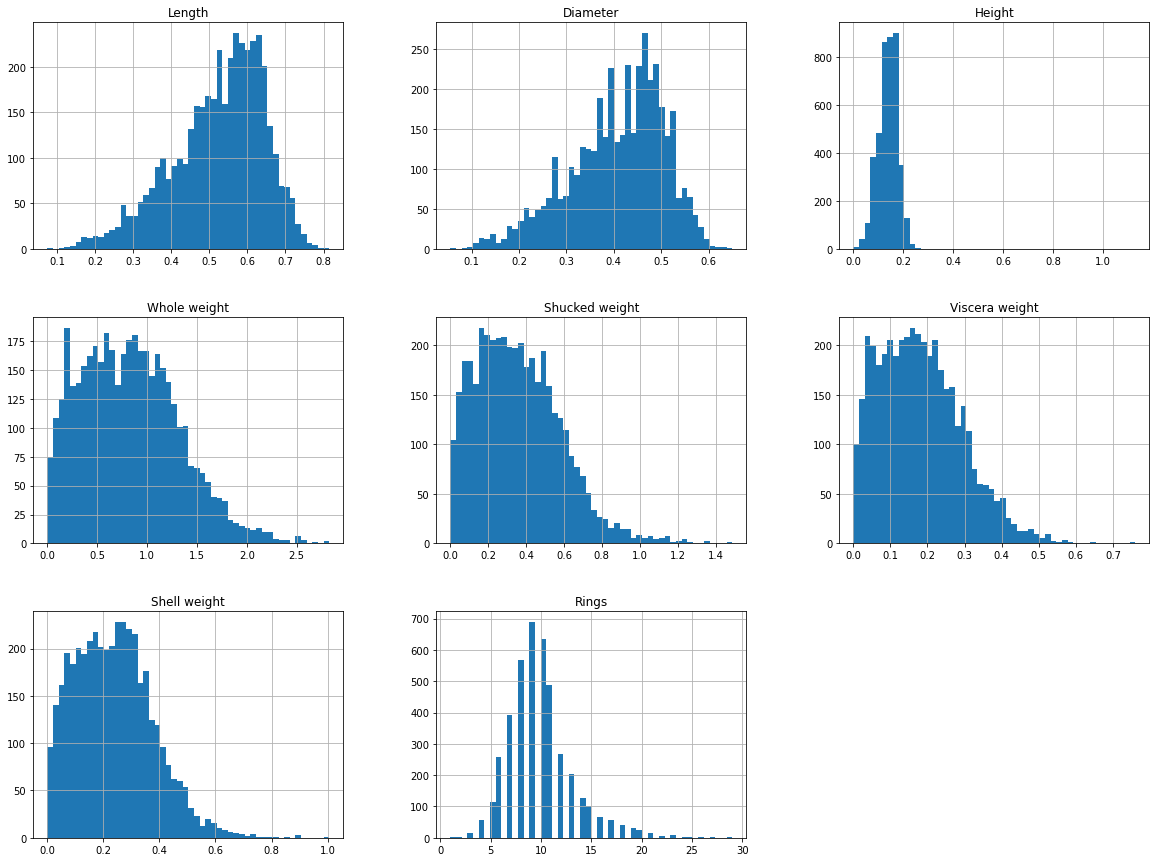

In [5]:
# plotting histograms for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
df1.hist(bins=50, figsize=(20,15))   #plotting histograms for all the numeric columns
plt.show()

From the histograms, we can see that **Height has the highest skewedness**. **Length, Diameter** distributions are similar and slightly skewed to the left with distribution shape resembling a closely normal distribution. Similarity is to be expected since these measurements are also likely to be correlated.  
**Whole weight, Shucked weight, Viscera weight, and Shell weight** are skewed to the right slightly positively and are very similar since they are all weight measurements. The shape of the distribution is similar to the shape of a lognormally distributed random variable.  
**Rings** is slightly skewed to the right and resembles a bell shaped distribution roughly.

###### a3. &emsp; Selecting two features to remove from the subsequent training and test steps
First, we will see the correlations of all the features in the dataset to get more information about them.

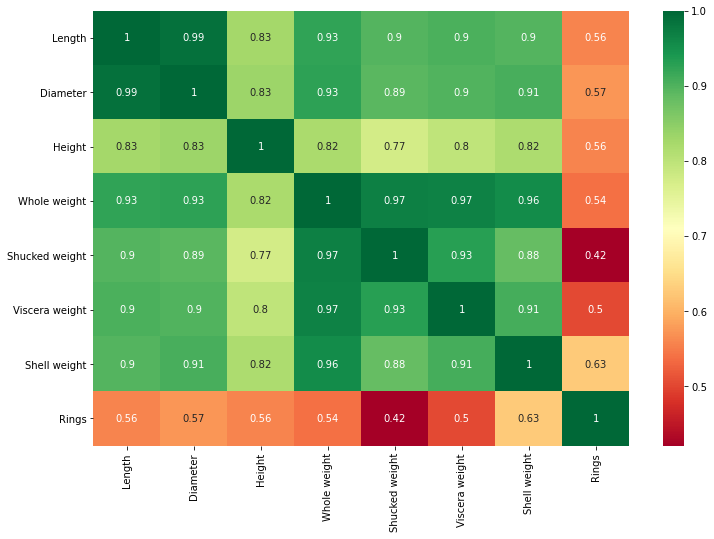

In [6]:
import seaborn as sns

x = df1.iloc[:,0:8]    #input columns of the dataset
y = df1.iloc[-1,:]    #output column of the dataset (here it is 'Sex')

cormatrix = df1.corr()    #retrieving the correlations of all the features in the dataset
best_corr_features = cormatrix.index
plt.figure(figsize=(12,8))

hmap = sns.heatmap(df1[best_corr_features].corr(), annot = True, cmap = "RdYlGn")    #plotting the heatmap

In our dataset, there are four weights features (descriptive attributes) for the abalone namely **Whole weight, Shucked weight, Viscera weight and Shell weight**.  
**Whole weight** is the weight of the whole abalone, **Shucked weight** is the weight of the meat of the abalone, **Viscera weight** is the gut abalone weight (after bleeding), and **Shell weight** is the weight of the abalone after drying.  
From the above correlation matrix, we can see that **Shucked weight and Viscera weight** features are not positively correlated with the **Rings**, which is our target feature.
As we want to predict the ring values of the abalone, (from which we can get the age of the abalone) without opening the shell to count the number of rings manually, **we can remove the features - Shucked weight and Viscera weight** from our subsequent training and testing steps, as they can be derived from the Whole weight feature of the abalone. We will do this in the below steps. Another reason for selecting these two features is that these instances can only be obtanined after killing the abalone, which is not our motive. 

In [7]:
#removing two features from the subsequent training and testing steps.
df1.drop(['Shucked weight', 'Viscera weight'], axis=1, inplace=True)   #removing 'Shucked weight' and 'Viscera weight' columns

###### a4. &emsp; Relabeling instances and using One hot encoding on the 'Sex' feature 
Before using One hot encoding on the 'Sex' feature, we will first relabel the M(Male) and F(Female) abalones as A(Adult) in the 'Sex' column. As, we are predicting the age of the abalones, we will categorize the abalones as Infants or Adults. We then apply one hot encoding technique for the 'Sex' column and then drop the original column from our data. We will represent a '0' for the A(Adult) and '1' for the I(infant).

In [8]:
#relabeling the 'M' and 'F' as 'A' in the 'Sex' column
df1['Sex'] = df1['Sex'].replace('M','A')
df1['Sex'] = df1['Sex'].replace('F','A')
print("The number of instances of each class are as below \n",df1['Sex'].value_counts())
df1.head(10)

The number of instances of each class are as below 
 A    2835
I    1342
Name: Sex, dtype: int64


,Sex,Length,Diameter,Height,Whole weight,Shell weight,Rings
0,A,0.455,0.365,0.095,0.5140,0.150,15
1,A,0.350,0.265,0.090,0.2255,0.070,7
2,A,0.530,0.420,0.135,0.6770,0.210,9
3,A,0.440,0.365,0.125,0.5160,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.120,8
6,A,0.530,0.415,0.150,0.7775,0.330,20
7,A,0.545,0.425,0.125,0.7680,0.260,16
8,A,0.475,0.370,0.125,0.5095,0.165,9
9,A,0.550,0.440,0.150,0.8945,0.320,19


In [9]:
#One hot encoding the 'Sex' feature
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
one_hot_encoder = cat_encoder.fit_transform(df1['Sex'].values.reshape(-1,1)).toarray()
df1_encoded = pd.DataFrame(one_hot_encoder, columns=["Sex_"+str(int(i)) for i in range(one_hot_encoder.shape[1])])
df1 = pd.concat([df1, df1_encoded],axis=1)
df1.head(10)
# 0 is 'Adult'(M,F) and 1 is 'Infant'

,Sex,Length,Diameter,Height,Whole weight,Shell weight,Rings,Sex_0,Sex_1
0,A,0.455,0.365,0.095,0.5140,0.150,15,1.0,0.0
1,A,0.350,0.265,0.090,0.2255,0.070,7,1.0,0.0
2,A,0.530,0.420,0.135,0.6770,0.210,9,1.0,0.0
3,A,0.440,0.365,0.125,0.5160,0.155,10,1.0,0.0
4,I,0.330,0.255,0.080,0.2050,0.055,7,0.0,1.0
5,I,0.425,0.300,0.095,0.3515,0.120,8,0.0,1.0
6,A,0.530,0.415,0.150,0.7775,0.330,20,1.0,0.0
7,A,0.545,0.425,0.125,0.7680,0.260,16,1.0,0.0
8,A,0.475,0.370,0.125,0.5095,0.165,9,1.0,0.0
9,A,0.550,0.440,0.150,0.8945,0.320,19,1.0,0.0


Now, we will drop the original 'Sex' feature from the data.

In [10]:
df1.drop(['Sex'], axis=1, inplace=True)   #removing 'Sex' column after one hot encoding
df1.head()

,Length,Diameter,Height,Whole weight,Shell weight,Rings,Sex_0,Sex_1
0,0.455,0.365,0.095,0.5140,0.150,15,1.0,0.0
1,0.350,0.265,0.090,0.2255,0.070,7,1.0,0.0
2,0.530,0.420,0.135,0.6770,0.210,9,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.155,10,1.0,0.0
4,0.330,0.255,0.080,0.2050,0.055,7,0.0,1.0



###### a5. &emsp; Plotting a scatter matrix for all the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002587EF865B0>,
      dtype=object)

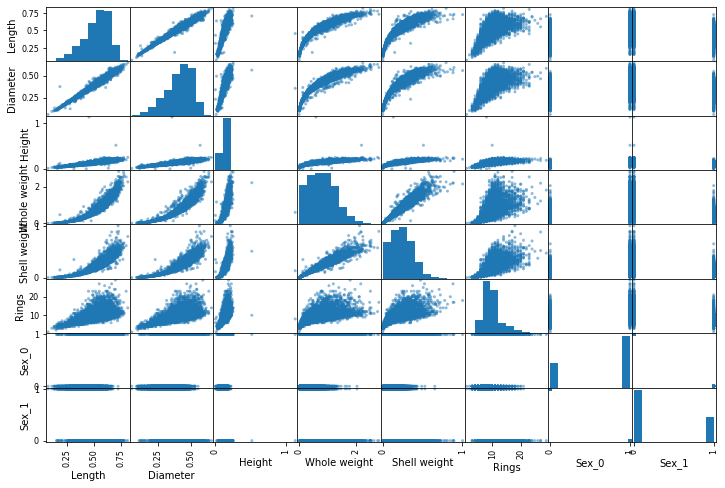

In [11]:
#plotting a scatter matrix for all the feature attributes
from pandas.plotting import scatter_matrix

attributes = ["Length","Diameter","Height","Whole weight","Shell weight","Rings", "Sex_0", "Sex_1"] # features list
scatter_matrix(df1[attributes],figsize=(12,8))  #plotting a scatter matrix for selected features

### TASK B: &emsp; AdaBoost Regressor - setup, training and prediction
###### b1. &emsp; Randomly splitting(85/15 split) the dataset to training and test sets using train_test_split function

In [12]:
#splitting the data to train and test sets using 85/15 split
#to make this notebook's output identical at every run
np.random.seed(10)

#dividing data into attributes and labels
x1 = df1.drop('Rings', axis=1)
y1 = df1.Rings

#splitting data to train and test sets
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.15, random_state=10)

print("The number of instances in the dataset are : ", len(df1))
print("The number of instances in the training set are: ", len(x1_train))
print("The number of instances in the test set are : ", len(x1_test))

The number of instances in the dataset are :  4177
The number of instances in the training set are:  3550
The number of instances in the test set are :  627


###### b2. &emsp; Setting up Base estimator SVR with RBF kernel and other appropriate hyperparameters
To implement the **AdaBoost Regressor**, we are **using the Support Vector Regressor with an RBF kernel as our base estimator**.
To reduce the problem of overfitting our model, we need to fine-tune our parameters. In our RandomizedSearch, we are using the parameters **n_estimators, learning_rate, and loss** as our parameter grid.  
* **n_estimators** is the maximum number of estimators at which boosting is terminated. In case of a perfect fit, the learning procedure is stopped early. The **default = 50**.
* **learning_Rate** shrinks the contribution of each regressor by learning_rate. There is a trade-off between learning_rate and n_estimators. the **Default is 1**.
* **loss :** is a function to use when updating the weights after each boosting iteration. It can be 'linear', 'square', 'exponential'. The **default is 'linear'**. 
In the below code, we are to choose **n_estimators as 4, 5**. We've experimented with different combinations of values for the parameters **learning_rate**[0.01,0.05,0.1], **loss**['linear','square','exponential']. For the **AdaBoost Regressor**, we are using the 'neg_mean_absolute_error' as a scoring parameter as we need to report the MAEs(Mean Absolute Errors) for the model.

In [13]:
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

base_model = [SVR(kernel='rbf',  tol=0.001, C=6, gamma=1)]
tuned_parameters = {'base_estimator': base_model,'n_estimators':[4,5], 'learning_rate': [0.001,0.01,0.05], 'loss':['linear','square','exponential'], 'random_state':[10]}

model = RandomizedSearchCV(AdaBoostRegressor(),tuned_parameters, scoring='neg_mean_absolute_error', cv=3, n_iter=10,n_jobs=-1, random_state=10, verbose=1)
model.fit(x1_train,y1_train)

print("\033[1mThe best parameters are %s with a score of %0.2f\033[0m" %(model.best_params_, model.best_score_))   #displaying the best parameter values after tuning
print("train score", model.score(x1_train, y1_train))
print("test score",model.score(x1_test, y1_test))

from sklearn.metrics import mean_absolute_error, accuracy_score
train_predictions = model.predict(x1_train)  #creating a vector of predictions on train set
train_predictions = np.rint(train_predictions)
train_predictions = train_predictions.astype(int)
#printing MAEs of the training and test data
from sklearn.model_selection import cross_val_score
#MAEs of training data
train_scores1 = cross_val_score(model, x1_train, y1_train.ravel(), scoring='neg_mean_absolute_error', cv=3)
print("MAEs of the original training set are", train_scores1)
print("\033[1mMean Absolute error for training set is:\033[0m",mean_absolute_error(y1_train, train_predictions))   #training error
#print("Accuracy of training set is:",accuracy_score(y1_train, train_predictions))   #accuracy for train data

test_predictions = model.predict(x1_test)    #creating a vector of predictions on test set
test_predictions = np.rint(test_predictions)  #rounding the predicted ring values to integer
test_predictions = test_predictions.astype(int)  
#MAEs of test data
test_scores1 = cross_val_score(model, x1_test, y1_test.ravel(), scoring='neg_mean_absolute_error', cv=3)
print("MAEs of the test set are", test_scores1)
print("\033[1mMean Absolute error for test set is:\033[0m",mean_absolute_error(y1_test,test_predictions))   #test error
#print("Accuracy of test set is:", accuracy_score(y1_test, test_predictions))   #accuracy for test data

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.5s finished


The best parameters are {'random_state': 10, 'n_estimators': 5, 'loss': 'linear', 'learning_rate': 0.05, 'base_estimator': SVR(C=6, gamma=1)} with a score of -1.57
train score -1.5469461893790113
test score -1.5254024739296
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.7s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.0s finished


MAEs of the original training set are [-1.61156311 -1.56353042 -1.53149262]
Mean Absolute error for training set is: 1.5338028169014084
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
MAEs of the test set are [-1.76188415 -1.47024072 -1.57836541]
Mean Absolute error for test set is: 1.4992025518341308


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [14]:
#printing the predicted and acutal ring values of our model on test data
#y1_test = list(y1_test)
#for j in range (len(test_predictions)):
#    print(f"Predicted Rings: {test_predictions[j]}, Acutal Rings: {y1_test[j]}")

### TASK C: &emsp; AdaBoost Regressor - results and plots
###### c1, c2 & c3. &emsp; MAE plots, plotting training and test results and final model's raw error plots

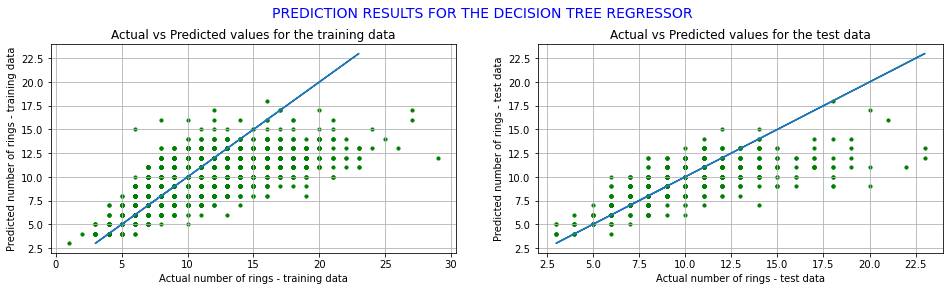

In [15]:
import matplotlib.pyplot as plt
#creating a grid for subplots
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

#plotting subplots
#plot 1:
ax1 = plt.subplot(1,2,1)
plt.plot(y1_test, y1_test)
ax1.scatter(y1_train, train_predictions, s=10, c="green")
ax1.set_title("Actual vs Predicted values for the training data")
ax1.set_xlabel("Actual number of rings - training data")
ax1.set_ylabel("Predicted number of rings - training data")
ax1.grid(True)


#plot 2:
ax2 = plt.subplot(1,2,2)
plt.plot(y1_test, y1_test)
plt.scatter(y1_test, test_predictions, s=10, c="green")
ax2.set_title("Actual vs Predicted values for the test data")
ax2.set_xlabel("Actual number of rings - test data")
ax2.set_ylabel("Predicted number of rings - test data")
ax2.grid(True)

plt.suptitle("PREDICTION RESULTS FOR THE DECISION TREE REGRESSOR", fontsize=14, color="blue")
plt.subplots_adjust(top=0.85)
plt.show()

(array([ 17.,  63., 305., 105.,  79.,  22.,  21.,   5.,   6.,   4.]),
 array([-4. , -2.5, -1. ,  0.5,  2. ,  3.5,  5. ,  6.5,  8. ,  9.5, 11. ]),
 <a list of 10 Patch objects>)

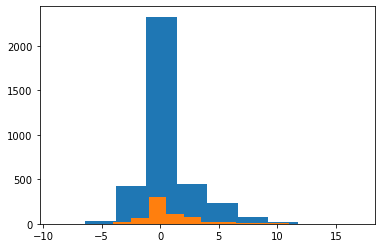

In [16]:
#plotting distributions of raw errors on train set
plt.hist(y1_train - train_predictions)
#plotting distributions of raw errors on test set
plt.hist(y1_test - test_predictions)

### TASK D: &emsp; AdaBoost Regressor - comparison and summary
From the results, we can say that as the multi model seems to do a bit better at predicting the number of rings (ages) of Infant abalones, when compared to the predicitions of the number of rings of the Adult abalones. This can be visible through the above prediction plots for both the training and test data.  
The MAE scores of the predictions for the test sets are a bit better when compared to the MAE scores of the predictions on the training data set.